# Radioactive Decay (SKP)

In [1]:
import sympy as smp
from sympy import *

t, lam, N0 = smp.symbols('t \lambda N_0', real=True, positive=True)
N = smp.symbols('N', cls=smp.Function)
N = N(t)
eq = Eq(N.diff(t), -lam*N)
display(eq)
Nsol = dsolve(eq, ics={N.subs(t,0):N0})
print('The solution of the differential equation is,')
display(Nsol)

Eq(Derivative(N(t), t), -\lambda*N(t))

The solution of the differential equation is,


Eq(N(t), N_0*exp(-\lambda*t))

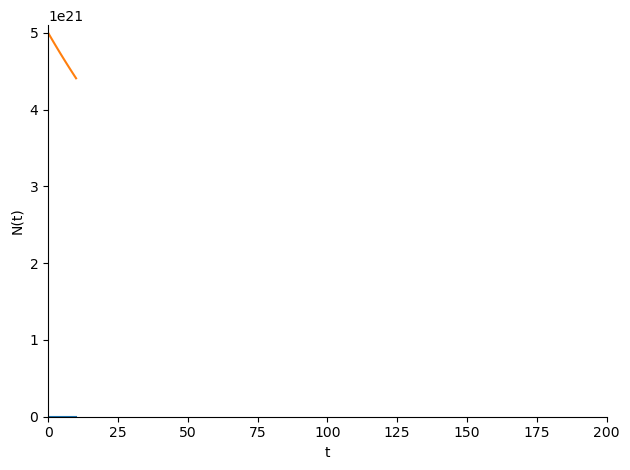

In [2]:
N00 = 5e21  # initial numbers of nuclei
t12 = 55  # half life
lam0 = 0.693/t12
Nplot = Nsol.subs([(lam,lam0), (N0,N00)])
smp.plot(t,Nplot.rhs,xlim=(0,200), ylim=(0,5.1e21), ylabel='N(t)')

In [3]:
Nplot.rhs

5.0e+21*exp(-0.0126*t)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

N0 = 5e21  # initial numbers of nuclei
t12 = 55  # half life
lam = 0.693/t12

# Write the differential equation (t=x, N=y).
def dydx(x,y):
    return -lam*y

x_0, y_0 = 0, N0         # initial condition
x_min, x_max = x_0, 200   # lower and upper limit of x
dx = (x_max-x_0)/1000    # infinitesimal length

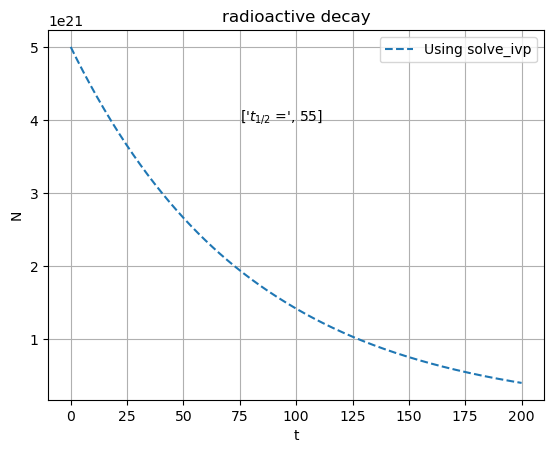

In [5]:
# Using solve_ivp
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = solve_ivp(dydx, t_span=(min(x), max(x)), y0=[y0], t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1, '--', label='Using solve_ivp')

plt.xlabel('t')
plt.ylabel('N')
plt.legend()
plt.title('radioactive decay')
plt.text(75,4e21, ["$t_{1/2}$ =", t12])
plt.grid()
plt.show()

## Successive Radioactive Decay

By radioactive decay, A is converted into B, B is converted into C and C is stable. Number of nuclei of A, B, C are $N_{10}, N_{20}, N_{30}$ initially and $N_1, N_2, N_3$ at any time respectively. Decay constant of A and B are $\lambda_1, \lambda_2$ respectively.

In [6]:
import sympy as smp
from sympy import *

In [7]:
t, lam1, lam2, N10, N20, N30, N0 = smp.symbols('t \lambda_1 \lambda_2 N_{10} N_{20} N_{30} N_0',
                                                real=True, positive=True)
N1, N2, N3 = smp.symbols('N_1 N_2 N_3', cls=smp.Function)
N1 = N1(t)
N2 = N2(t)
N3 = N3(t)

In [8]:
eq1 = Eq(N1.diff(t), -lam1*N1)
eq2 = Eq(N2.diff(t), lam1*N1-lam2*N2)
eq3 = Eq(N3.diff(t), lam2*N2)
display(eq1, eq2, eq3)

Eq(Derivative(N_1(t), t), -\lambda_1*N_1(t))

Eq(Derivative(N_2(t), t), \lambda_1*N_1(t) - \lambda_2*N_2(t))

Eq(Derivative(N_3(t), t), \lambda_2*N_2(t))

In [9]:
N1sol = dsolve(eq1, ics={N1.subs(t,0):N10})
N2sol = dsolve(eq2.subs(N1,N1sol.rhs), ics={N2.subs(t,0):N20})
N3sol = dsolve(eq3.subs(N2,N2sol.rhs), ics={N3.subs(t,0):N30})
display(N1sol, N2sol, N3sol)

Eq(N_1(t), N_{10}*exp(-\lambda_1*t))

Eq(N_2(t), -N_{10}*\lambda_1*exp(-\lambda_1*t)/(\lambda_1 - \lambda_2) + (N_{10}*\lambda_1 + N_{20}*\lambda_1 - N_{20}*\lambda_2)*exp(-\lambda_2*t)/(\lambda_1 - \lambda_2))

Eq(N_3(t), N_{10} + N_{20} + N_{30} + \lambda_2*(-N_{10}*\lambda_1*exp(-\lambda_2*t)/\lambda_2 + N_{10}*exp(-\lambda_1*t) - N_{20}*\lambda_1*exp(-\lambda_2*t)/\lambda_2 + N_{20}*exp(-\lambda_2*t))/(\lambda_1 - \lambda_2))

If of B and C are initially absent and $N_{10}=N_0$,

In [10]:
N1sol1 = N1sol.subs(N10,N0)
N2sol1 = N2sol.subs([(N10,N0), (N20,0)])
N3sol1 = N3sol.subs([(N10,N0), (N20,0), (N30,0)])

In [11]:
display(N1sol1, N2sol1, N3sol1)

Eq(N_1(t), N_0*exp(-\lambda_1*t))

Eq(N_2(t), N_0*\lambda_1*exp(-\lambda_2*t)/(\lambda_1 - \lambda_2) - N_0*\lambda_1*exp(-\lambda_1*t)/(\lambda_1 - \lambda_2))

Eq(N_3(t), N_0 + \lambda_2*(-N_0*\lambda_1*exp(-\lambda_2*t)/\lambda_2 + N_0*exp(-\lambda_1*t))/(\lambda_1 - \lambda_2))

### Graphs for a given half-lives and initial numbers of nuclei:

In [12]:
t121, t122 = 1.6, 0.9
N00 = 2e20

In [13]:
lam10 = (0.693/t121)
lam20 = (0.693/t122)
N1plot = N1sol1.subs([(lam1,lam10),(N0,N00)])
N2plot = N2sol1.subs([(lam1,lam10), (lam2,lam20), (N0,N00)])
N3plot = N3sol1.subs([(lam1,lam10), (lam2,lam20), (N0,N00)])
display(N1plot, N2plot, N3plot)

Eq(N_1(t), 2.0e+20*exp(-0.433125*t))

Eq(N_2(t), -2.57142857142857e+20*exp(-0.77*t) + 2.57142857142857e+20*exp(-0.433125*t))

Eq(N_3(t), 2.0e+20 + 2.57142857142857e+20*exp(-0.77*t) - 4.57142857142857e+20*exp(-0.433125*t))

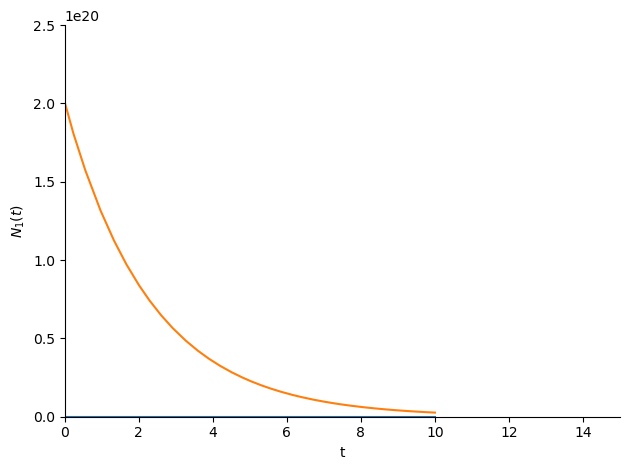

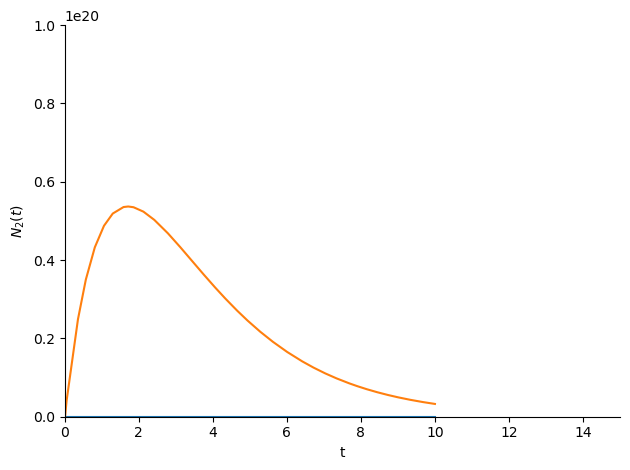

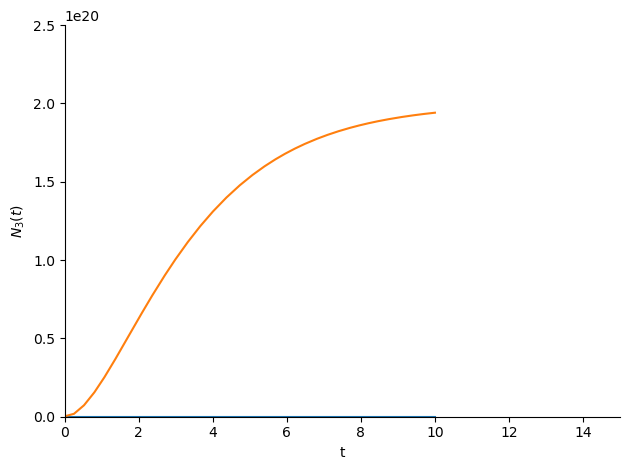

In [14]:
smp.plot(t, N1plot.rhs, xlim=(0,15), ylim=(0, 2.5e20), ylabel='$N_1(t)$')
smp.plot(t, N2plot.rhs, xlim=(0,15), ylim=(0, 1e20), ylabel='$N_2(t)$')
smp.plot(t, N3plot.rhs, xlim=(0,15), ylim=(0, 2.5e20), ylabel='$N_3(t)$')

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

t121, t122 = 1.6, 0.9  # half lives
N00 = 2e20     # initial numbers of nuclei
lam1, lam2 = 0.693/t121, 0.693/t122

# Write the differential equation. (t=x, N1=y, N2=yp, N3=ypp)

def dSdx(x,S):
    y, yp, ypp = S
    return [-lam1*y, +lam1*y -lam2*yp, +lam2*yp] 

def dydx(x,y,yp,ypp):
    return -lam1*y
def dypdx(x,y,yp,ypp):
    return +lam1*y -lam2*yp
def dyppdx(x,y,yp,ypp):
    return +lam2*yp

x_0, y_0, yp_0, ypp_0 = 0, N00, 0, 0  # initial conditions
x_min, x_max = x_0, 10     # lower and upper limit of x
dx = (x_max-x_0)/1000    # infinitesimal length


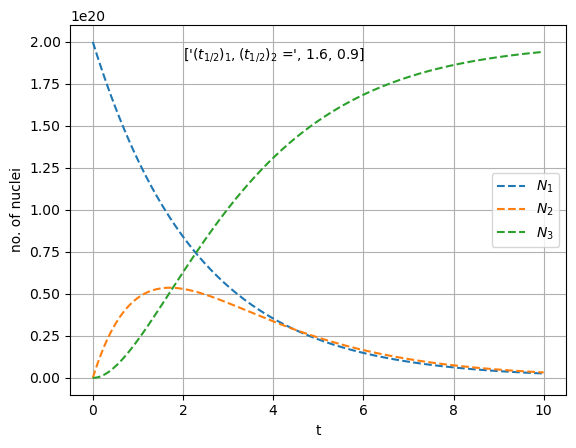

In [16]:
# Using solve_ivp
y0, yp0, ypp0 = y_0, yp_0, ypp_0
S0 = (y0,yp0,ypp0)
x = np.linspace(x_min, x_max,200)
sol = solve_ivp(dSdx, t_span=(min(x), max(x)), y0=S0, t_eval=x)
y1 = sol.y[0]
y2 = sol.y[1]
y3 = sol.y[2]
plt.plot(x,y1, '--', label='$N_1$')
plt.plot(x,y2, '--', label='$N_2$')
plt.plot(x,y3, '--', label='$N_3$')
plt.xlabel('t')
plt.ylabel('no. of nuclei')
plt.text(2,1.9e20, ["$(t_{1/2})_1, (t_{1/2})_2$ =", t121, t122])
plt.legend()
plt.grid()
plt.show()

## Successive Radioactive Decay (A, B, C, D)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

t121, t122, t123 = 1.6, 0.9, 1.2  # half lives
N00 = 2e20     # initial numbers of nuclei
lam1, lam2, lam3 = 0.693/t121, 0.693/t122, 0.693/t123

# Write the differential equation. (t=x, N1=y, N2=yp, N3=ypp)

def dSdx(x,S):
    y, yp, ypp, yppp = S
    return [-lam1*y, +lam1*y -lam2*yp, +lam2*yp -lam3*ypp, +lam3*ypp] 

def dydx(x,y,yp,ypp,yppp):
    return -lam1*y
def dypdx(x,y,yp,ypp,yppp):
    return +lam1*y -lam2*yp
def dyppdx(x,y,yp,ypp,yppp):
    return +lam2*yp -lam3*ypp
def dypppdx(x,y,yp,ypp,yppp):
    return +lam3*ypp

x_0,y_0,yp_0,ypp_0,yppp_0 = 0,N00,0,0,0  # initial conditions
x_min, x_max = x_0, 10   # lower and upper limit of x
dx = (x_max-x_0)/1000    # infinitesimal length

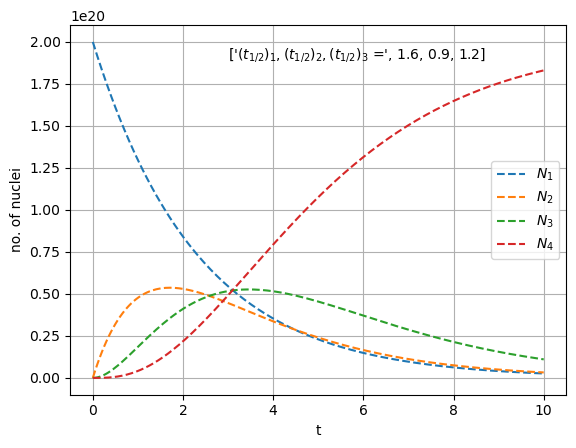

In [18]:
# Using solve_ivp
y0, yp0, ypp0, yppp0 = y_0, yp_0, ypp_0, yppp_0
S0 = (y0,yp0,ypp0,yppp0)
x = np.linspace(x_min, x_max,200)
sol = solve_ivp(dSdx, t_span=(min(x), max(x)), y0=S0, t_eval=x)
y1 = sol.y[0]
y2 = sol.y[1]
y3 = sol.y[2]
y4 = sol.y[3]
plt.plot(x,y1, '--', label='$N_1$')
plt.plot(x,y2, '--', label='$N_2$')
plt.plot(x,y3, '--', label='$N_3$')
plt.plot(x,y4, '--', label='$N_4$')
plt.text(3,1.9e20, ['$(t_{1/2})_1, (t_{1/2})_2, (t_{1/2})_3$ =', t121, t122, t123])
plt.xlabel('t')
plt.ylabel('no. of nuclei')
plt.legend()
plt.grid()
plt.show()